In [72]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.special import gammaincc as gamma
%matplotlib inline

# Problem 1 - Taxonomy; COME BACK

[6 points] In class we have discussed different ways to morphologically classify galaxies. If you had to introduce a
“morphological” galaxy classification scheme, how would it look like? Describe and justify your classification
system. 

# Problem 2 - Galaxy Correlations in SDSS


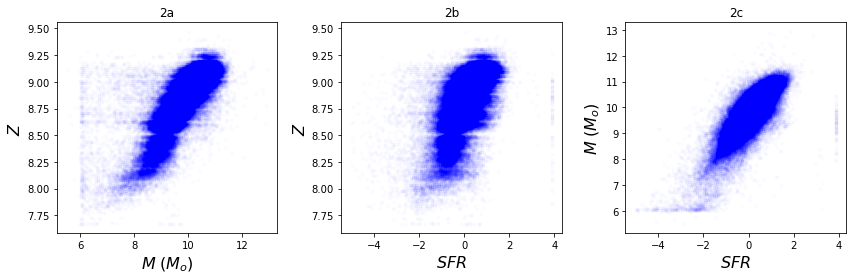

In [79]:
plt.figure(1, figsize=(12,4))
plt.subplot(131); plt.title('2a');
plt.plot(M, Z, 'b.', alpha=0.01)
plt.xlabel('$M\;(M_{o})$', fontsize=16); plt.ylabel('$Z$', fontsize=16)
plt.subplot(132); plt.title('2b')
plt.plot(S, Z, 'b.', alpha=0.01)
plt.xlabel('$SFR$', fontsize=16); plt.ylabel('$Z$', fontsize=16);
plt.subplot(133); plt.title('2c')
plt.plot(S, M, 'b.', alpha=0.01)
plt.xlabel('$SFR$', fontsize=16); plt.ylabel('$M\;(M_{o})$', fontsize=16)
plt.tight_layout()

2a) The dependence of metallicity on solar mass may be in part explained by outflows.  Galaxies of smaller mass have lower metal abundances because their lower escape velocities.

2c) At given stellar mass, the strength of the correlation between gas-phase metallicity and star formation rate varies, as shown in the figure below.  Correlation coefficient between Z and SFR is plotted as a function of stellar mass, with red regions showing weak correlation and yellow showing moderate correlation (assuming a linear relationship).  The correlation is strongest (and positive) at the lowest and highest ends of the mass range.

### 2d) WHY ARE Z AND S CORRELATED??? What could be the physical explanation of this possible secondary dependence?

Text(0,0.5,'$Correlation \\: Coefficient$')

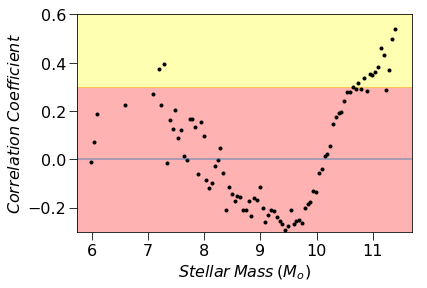

In [95]:
M_bins = np.arange(M[12], M[-1], .05)
corrs = np.zeros(len(M_bins))
for i in range(len(M_bins)-1):
    idx = np.where((M > M_bins[i]) & (M < M_bins[i+1]))
    if len(M[idx]) > 50:
        corrs[i] = np.corrcoef(Z[idx], S[idx])[0,1]
good = np.where(corrs != 0)    
plt.plot(M_bins[good], corrs[good], 'k.')
plt.axhspan(-0.3, 0.3, color='red', alpha=0.3)
plt.axhspan(0.3, 0.7, color='yellow', alpha=0.3)
plt.axhline(0, alpha=0.5)
plt.axis([5.75, 11.7, -.3, 0.6])
plt.xlabel('$Stellar \: Mass \:(M_o)$', fontsize=16)
plt.ylabel('$Correlation \: Coefficient$', fontsize=16)

# Problem 3 - Magnitudes, Fluxes, and K-Corrections

In [349]:
m_g = 16.86
z = 0.1
c = 3e5 # km/s
H = 70.4  #km /s /Mpc
v =  c * z #km /s 
d = (v / H) * 1e6 #pc
M_g = m_g - 5 * np.log10(d/10)
M_g

-21.287742977887753

# 3b-c

3c. Though close, the observed spectrum does not overlap with the SED. ###WHHHYY##

3d. I used the g-band response function for an exteded source (because this galaxy is resolved by SDSS and is not a point source) at an airmass of 1.3 (because SDSS data was taken with a ground-based telescsope).

e. [10 points] As is clear from the figure made in the d, the observed and rest-frame magnitudes will be different.
Use the spectrum to calculate the K-correction in the g-band. Please note that the response functions are
determined for photon-counting detectors, which means you have to integrate in λ Fλ or ν Fν.

f. [6 points] What is rest-frame g-band luminosity of this galaxy?

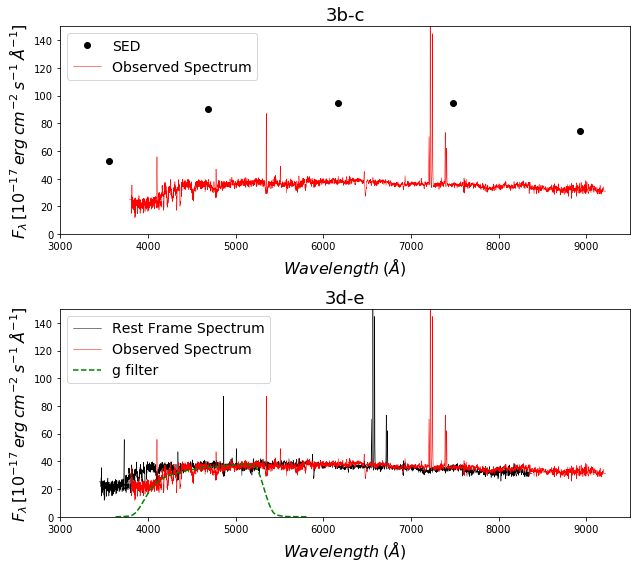

In [107]:
# organize photometry data
filters = ['u', 'g', 'r', 'i', 'z']
mags = np.array([18.06, 16.88, 16.23, 15.81, 15.69])
mag_errs = np.array([0.02, 0, 0, 0, 0.01])
cents = np.array([3551, 4686, 6165, 7481, 8931])

# calculate flux magnitudes
ν = 3e18 / cents
f_ν = 10**((mags+48.57)/(-2.5))
f_λ = f_ν * ν**2 / (3e8 * 1e10)
f_ν_err = 10**((mag_errs+48.57)/(-2.5))
f_λ_err = f_ν_err * ν**2 / (3e8 * 1e10)

#Read in spec file
spec_file = "spSpec-51788-0401-161.fit"
hdul = fits.open(spec_file)
hdr = hdul[0].header
data = hdul[0].data
spec = np.array(data[0])
spec_err = np.array(data[2])
x = np.arange(0, hdr['NAXIS1'], 1)
λ = 10**(hdr['COEFF0'] + hdr['COEFF1'] * x)

#Calculate rest frame spectrum from redshift
z = hdr['Z']
λ_rf = λ / (z+1)

g_band = Table.read('g.dat', format='ascii')

#Plot stuff
plt.figure(1, figsize=(9, 8))
plt.subplot(211)
plt.plot(cents, f_λ*1e17, 'ko', label='SED')
plt.plot(λ, spec, 'r-', linewidth=0.5, label='Observed Spectrum')
plt.axis([3000, 9500, 0, 150])
plt.xlabel('$Wavelength \: (\AA)$', fontsize=16)
plt.ylabel('$F_\lambda \: [10^{-17} \: erg \: cm^{-2} \: s^{-1} \: \AA^{-1}]$', fontsize=16)
plt.title('3b-c', fontsize=18)
plt.legend(loc=2, fontsize=14)

plt.subplot(212)
plt.title('3d-e', fontsize=18)
plt.plot(λ_rf, spec, 'k-', linewidth=0.5, label='Rest Frame Spectrum')
plt.plot(λ, spec, 'r-', linewidth=0.5, label='Observed Spectrum')
plt.plot(g_band['col1'], g_band['col4']*38/.42, 'g--', label='g filter')
plt.axis([3000, 9500, 0, 150])
plt.xlabel('$Wavelength \: (\AA)$', fontsize=16)
plt.ylabel('$F_\lambda \: [10^{-17} \: erg \: cm^{-2} \: s^{-1} \: \AA^{-1}]$', fontsize=16)
plt.legend(loc=2, fontsize=14)

plt.tight_layout()

# 4b - Schecter Function

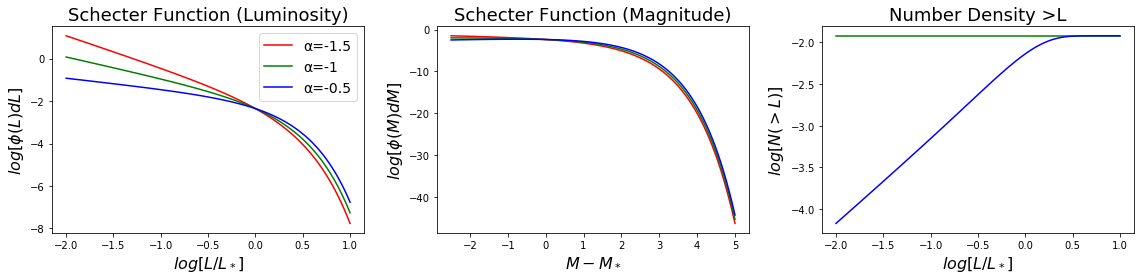

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


α = [-1.5, -1, -0.5]
colors = ['r', 'g', 'b']
L_L = np.logspace(-2, 1, 100) # x=L/L*
ϕ_s = 1.2e-2
M_M = -2.5 * np.log10(x)

plt.figure(figsize=(16,4))
for i in range(3):

    # Luminoisty function
    ϕL = ϕ_s * x**α[i] * np.exp(-L_L)

    # In Magnitude
    nM = 0.4 * np.log(10)*ϕ_s*(10**(0.4*M_M*(α[i]+1)))*np.exp(-10**(0.4*M_M))

    # Numbr density
    nL = ϕ_s * gamma(L_L, α[i]+1)

    plt.subplot(131)
    plt.plot(np.log10(L_L), np.log10(ϕL), '-', color=colors[i], label='α='+str(α[i]))
    plt.xlabel('$log[L/L_*]$', fontsize=16)
    plt.ylabel('$log[\phi(L)dL]$', fontsize=16)
    plt.title('Schecter Function (Luminosity)', fontsize=18)

    plt.subplot(132)
    plt.plot(M_M, np.log10(nM), '-', color=colors[i])
    #plt.gca().invert_xaxis()
    plt.xlabel('$M-M_*$', fontsize=16)
    plt.ylabel('$log[\phi(M)dM]$', fontsize=16)
    plt.title('Schecter Function (Magnitude)', fontsize=18)
    #plt.axis([-3, 3, -15, 0])

    plt.subplot(133)
    plt.plot(np.log10(L_L), np.log10(nL), '-', color=colors[i])
    plt.xlabel('$log[L/L_*]$', fontsize=16)
    plt.ylabel('$log[N(>L)]$', fontsize=16)
    plt.title('Number Density >L', fontsize=18)

plt.subplot(131)
plt.legend(fontsize=14)
plt.tight_layout()

In [67]:
np.sum(np.log10(ϕL))

-231.46036265692442